In [ ]:
# -*- coding: utf-8 -*-
#Datasets para Natalia
#https://www.kaggle.com/shawon10/ckplus
#https://github.com/muxspace/facial_expressions

# Librerías propias para las redes neuronales por convolución

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.python.keras import applications
# Libreria para arreglos multidimensionales
import numpy as np


# Librería para graficar 
import matplotlib.pyplot as plt
from scipy import interp
from itertools import cycle
import itertools

# Librerías para obtener métricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc


from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# /content/drive/My Drive/Semestre virtual/CIENCIAS DE DATOS/final
# Rutas de los conjuntos de imagenes
ruta_dataset_entrenamiento = "/content/drive/My Drive/final/data4/training"
ruta_dataset_prueba = "/content/drive/My Drive/final/data4/test"
ruta_dataset_validacion = "/content/drive/My Drive/final/data4/validation"
num_classes = 6

In [ ]:
# Preprocesamiento
#Data aumentation
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
#Load Data
train_generator = train_datagen.flow_from_directory(ruta_dataset_entrenamiento,target_size=(224,224),color_mode='rgb',batch_size=32,class_mode='categorical',shuffle=True)
test_generator = test_datagen.flow_from_directory(ruta_dataset_prueba,target_size=(224,224),color_mode='rgb',batch_size=1,class_mode='categorical',shuffle=False)
validation_generator = validation_datagen.flow_from_directory(ruta_dataset_validacion,target_size=(224,224),color_mode='rgb',batch_size=32,class_mode='categorical',shuffle=True)

Found 6848 images belonging to 6 classes.
Found 3388 images belonging to 6 classes.
Found 3410 images belonging to 6 classes.


In [ ]:
# Load Model VGG16
model_loaded = load_model("/content/drive/My Drive/final/Modelos/model_VGG19.h5")

In [ ]:
step_size_test=test_generator.n/test_generator.batch_size
result_evaluate =  model_loaded.evaluate_generator(test_generator,step_size_test,verbose=1)
print(result_evaluate)

Instructions for updating:
Please use Model.evaluate, which supports generators.
3388/3388 [==============================] - 1695s 500ms/step - loss: 1.9795 - accuracy: 0.6095
[1.9794831275939941, 0.6095041036605835]


In [ ]:
y_pred_prob =  model_loaded.predict_generator(test_generator, steps= step_size_test)
y_pred_classes = np.argmax(y_pred_prob, axis=1)
test_labels_one_hot = to_categorical(test_generator.classes)

Instructions for updating:
Please use Model.predict, which supports generators.


In [ ]:
y_pred_prob

array([[3.2847352e-02, 2.8221644e-08, 4.6235587e-02, 9.1013020e-01,
        1.7181422e-03, 9.0687070e-03],
       [3.8184542e-02, 9.1232621e-08, 4.9864683e-01, 4.3538746e-01,
        1.8430427e-02, 9.3507161e-03],
       [3.2228623e-02, 3.2149142e-08, 3.9750671e-01, 5.4886168e-01,
        1.3420441e-02, 7.9825474e-03],
       ...,
       [5.7165798e-02, 9.5934661e-07, 2.6466665e-01, 6.2361026e-01,
        2.8641935e-02, 2.5914444e-02],
       [4.4136578e-03, 1.0284747e-07, 1.2629841e-01, 8.3494693e-01,
        1.3398421e-03, 3.3001069e-02],
       [1.1698086e-01, 2.2820210e-08, 2.5176057e-01, 6.0989594e-01,
        6.1609489e-03, 1.5201571e-02]], dtype=float32)

{0: array([0.00000000e+00, 0.00000000e+00, 9.02798676e-04, 9.02798676e-04,
       3.31026181e-03, 3.31026181e-03, 7.22238941e-03, 7.22238941e-03,
       9.32891965e-03, 9.32891965e-03, 1.05326512e-02, 1.05326512e-02,
       1.26391815e-02, 1.26391815e-02, 3.12970208e-02, 3.12970208e-02,
       3.37044839e-02, 3.37044839e-02, 3.46072826e-02, 3.46072826e-02,
       3.49082155e-02, 3.49082155e-02, 3.55100813e-02, 3.55100813e-02,
       3.61119470e-02, 3.61119470e-02, 4.03250075e-02, 4.03250075e-02,
       6.07884442e-02, 6.07884442e-02, 6.28949744e-02, 6.28949744e-02,
       6.74089678e-02, 6.74089678e-02, 6.83117665e-02, 6.83117665e-02,
       7.16220283e-02, 7.16220283e-02, 1.00812519e-01, 1.00812519e-01,
       1.04724646e-01, 1.04724646e-01, 1.41438459e-01, 1.41438459e-01,
       1.50466446e-01, 1.50466446e-01, 1.62503762e-01, 1.62503762e-01,
       1.65212158e-01, 1.65212158e-01, 2.18477280e-01, 2.18477280e-01,
       2.37135119e-01, 2.37135119e-01, 2.44658441e-01, 2.44658441e-01,
  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


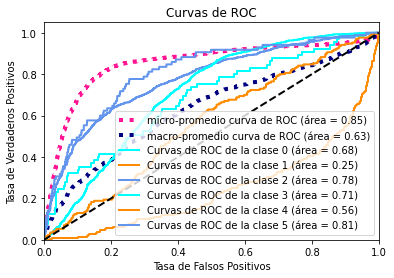

In [ ]:
y_pred_prob =  model_loaded.predict_generator(test_generator, steps= step_size_test)
y_pred_classes = np.argmax(y_pred_prob, axis=1)
test_labels_one_hot = to_categorical(test_generator.classes)


fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(test_labels_one_hot[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
print(fpr)
fpr["micro"], tpr["micro"], _ = roc_curve(test_labels_one_hot.ravel(), y_pred_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(num_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(num_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= num_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
plt.plot((fpr["micro"]), (tpr["micro"]),
         label='micro-promedio curva de ROC (área = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)


plt.plot(fpr["macro"], tpr["macro"],
         label='macro-promedio curva de ROC (área = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(num_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='Curvas de ROC de la clase {0} (área = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curvas de ROC')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(test_generator.classes, y_pred_classes)
print('Accuracy: %f' % accuracy)

Accuracy: 0.609504


In [ ]:
print(test_generator.classes)
print(y_pred_classes)

[0 0 0 ... 5 5 5]
[3 2 3 ... 3 3 3]


In [ ]:
# precision tp / (tp + fp)
precision = precision_score(test_generator.classes, y_pred_classes, average = 'macro')
print('Precision:', precision)

Precision: 0.31769107531960566


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# recall: tp / (tp + fn)
recall = recall_score(test_generator.classes, y_pred_classes, average = 'macro')
print('Recall: %f' % recall)

Recall: 0.247054


In [ ]:
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(test_generator.classes, y_pred_classes, average = 'macro')
print('F1 score: %f' % f1)

F1 score: 0.233345


In [ ]:
# kappa
kappa = cohen_kappa_score(test_generator.classes, y_pred_classes)
print('Cohens kappa: %f' % kappa)

Cohens kappa: 0.325337


In [ ]:
# confusion matrix
matrix = confusion_matrix(test_generator.classes, y_pred_classes)
print(matrix)

[[   2    0   28   35    0    0]
 [   0    0   61  139    0    0]
 [   2    0  950  502    0    0]
 [   1    0  299 1112    0    2]
 [   1    0   54  115    0    0]
 [   0    0   13   71    0    1]]


In [1]:
cmap = plt.get_cmap('Blues')
plt.figure(figsize=(8, 6))
plt.imshow(matrix, interpolation='nearest',cmap=cmap)
plt.title("Matriz de Confusión")
plt.colorbar()
target_names = ["Enfado","Asco","Felicidad","Neutral","Tristeza","Sorpresa"]

if target_names is not None:
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)



thresh = matrix.max() / 1.5
matrix.max() / 2
for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
        plt.text(j, i, "{:,}".format(matrix[i, j]),horizontalalignment="center",color="white" if matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('Etiqueta Verdadera')
plt.xlabel('Etiqueta predicha ')
plt.show()

NameError: ignored